Reworking **@Hey Amit**'s Medium article: [Interpretable Reinforcement Learning Models with Decision Trees](https://medium.com/@heyamit10/interpretable-reinforcement-learning-models-with-decision-trees-224ba69170e8).

#1. Setup Environment
##1.1. Install packacges

In [ ]:
!pip install stable-baselines3[extra]
!pip install 'shimmy>=2.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

##1.2. Import packages
The demo used the `gym` package, but I'm using `gymnasium` for compatibility with recent updates to `gym` and `stable_baselines3`.

In [ ]:
import gymnasium as gym # in the demo this was imported as "gym", but it broke later on
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# from gymnasium.wrappers import RecordVideo  # Having issues with RecordVideo atm
import matplotlib.pyplot as plt

#2. Problem Setup
##2.1. Defining the RL Task
Creating a simple cartpole environment. `n_envs` lets us run multiple cartpole environments in parallel.

In [ ]:
# Initialize the environment
env = make_vec_env("CartPole-v1", n_envs=4)

# Print state and action spaces for clarity
print(f"State space: {env.observation_space}")
print(f"Action space: {env.action_space}")

State space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space: Discrete(2)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#3. Training a Standard RL Model
3.1. Baseline RL Algorithm

In [ ]:
# Create the environment
env = gym.make('CartPole-v1')

# Initialize the model with a basic MLP policy
model = DQN('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=50000)

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.184    |
|    n_updates        | 4986     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1912     |
|    fps              | 804      |
|    time_elapsed     | 24       |
|    total_timesteps  | 20083    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.206    |
|    n_updates        | 4995     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1916     |
|   

3.2 Evaluating the baseline

In [ ]:
# Test the trained model
state = np.array(env.reset()[0])  # converted to np array
done = False

while not done:
    # Predict the action for the current state
    action, _states = model.predict(state, deterministic=True)

    # Take the action and get the next state
    state, reward, done, info, _ = env.step(action)  # added _

    # Render the environment to visualize performance
    env.render()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


#4. Decision Tree RL: Theory Meets Practice
4.1. Extracting Policy from the RL model

In [ ]:
# Generate dataset from the trained policy
def generate_dataset(env, model, n_samples=1000):
    X, y = [], []
    for _ in range(n_samples):
        state = np.array(env.reset()[0])  # converted to np array
        done = False
        while not done:
            # Sample state-action pairs
            action, _ = model.predict(state)
            X.append(state)  # State as input
            y.append(action)  # Action as output
            state, _, done, _, _ = env.step(action)
    return X, y

# Generate data
X, y = generate_dataset(env, model)

# Train the decision tree
clf = DecisionTreeClassifier(max_depth=5)  # Limit depth for interpretability
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

4.2. Interpreting the Decision Tree

In [ ]:
# Visualize the decision tree
dot_data = export_graphviz(
    clf,
    feature_names=[f"feature_{i}" for i in range(len(X[0]))],
    class_names=['Left', 'Right'],  # Actions in CartPole
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'decision_tree.pdf'

#5. Fine-Tuning the Decision Tree Model
##5.2 Testing the Tree-Based Policy

In [ ]:
# Define the policy function based on the trained tree
def tree_policy(state):
    return clf.predict([state])[0]

# Test the policy in the environment
state = np.array(env.reset()[0])
done = False

while not done:
    action = tree_policy(state)  # Get action from the decision tree
    state, reward, done, info, _ = env.step(action)  # Take the action
    env.render()  # Visualize performance

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/e

#6. Comparing Performance
##6.1 Metrics for Comparison

In [ ]:
# Function to evaluate a given policy
def evaluate_policy(env, policy_fn, episodes=10):
    rewards = []
    for _ in range(episodes):
        state = np.array(env.reset()[0])
        done = False
        episode_reward = 0
        while not done:
            action = policy_fn(state)  # Use the policy function to decide the action
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
        rewards.append(episode_reward)
    return sum(rewards) / episodes


# Evaluate the baseline RL policy
baseline_reward = evaluate_policy(env, lambda s: model.predict(s, deterministic=True)[0])

# Evaluate the decision tree policy
tree_reward = evaluate_policy(env, tree_policy)

print(f"Baseline RL Reward: {baseline_reward}")
print(f"Decision Tree Reward: {tree_reward}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Baseline RL Reward: 148.7
Decision Tree Reward: 107.6


#6.2 Visualizing Results
Plot 1: Reward Comparison

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


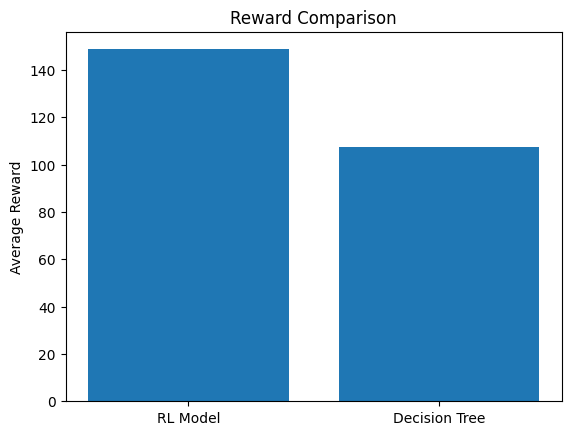

In [ ]:
# Plot rewards
labels = ['RL Model', 'Decision Tree']
rewards = [baseline_reward, tree_reward]

plt.bar(labels, rewards)
plt.title('Reward Comparison')
plt.ylabel('Average Reward')
plt.show()

Plot 2: Tree Depth vs. Performance

Decision Tree (Depth 3) Reward: 132.3
Decision Tree (Depth 7) Reward: 131.8
Decision Tree (Depth 10) Reward: 133.8


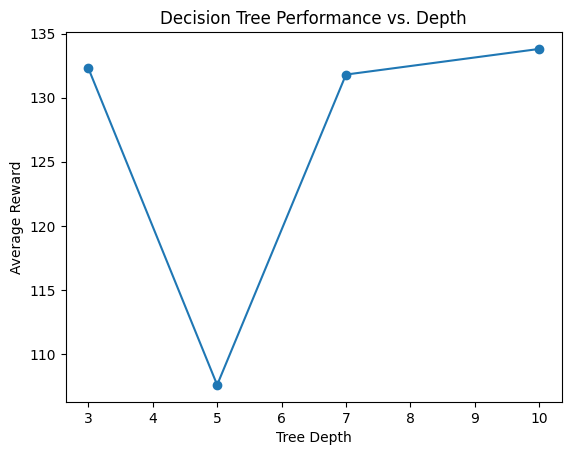

In [ ]:
# Train and evaluate decision trees with various depths
clf3 = DecisionTreeClassifier(max_depth=3)
clf7 = DecisionTreeClassifier(max_depth=7)
clf10 = DecisionTreeClassifier(max_depth=10)

clf3.fit(X, y)
clf7.fit(X, y)
clf10.fit(X, y)

# Evaluate the decision tree pokicy
tree_reward_3 = evaluate_policy(env, lambda s: clf3.predict([s])[0])
tree_reward_7 = evaluate_policy(env, lambda s: clf7.predict([s])[0])
tree_reward_10 = evaluate_policy(env, lambda s: clf10.predict([s])[0])

# Print rewards
print(f"Decision Tree (Depth 3) Reward: {tree_reward_3}")
print(f"Decision Tree (Depth 7) Reward: {tree_reward_7}")
print(f"Decision Tree (Depth 10) Reward: {tree_reward_10}")

# Plot rewards
tree_depths = [3, 5, 7, 10]
tree_rewards = [tree_reward_3, tree_reward, tree_reward_7, tree_reward_10]

plt.plot(tree_depths, tree_rewards, marker='o')
plt.title('Decision Tree Performance vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Average Reward')
plt.show()